In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

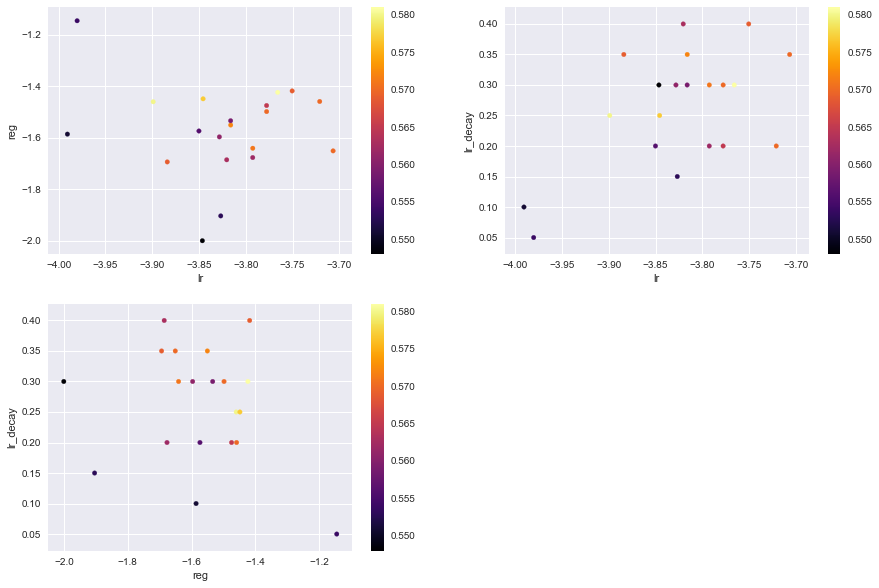

In [24]:
def get_modelname(acc, params):
    modelname = 'model.acc:%f.lr:%f.reg:%f.dropout.%f' % \
        (acc, params[0], params[1], params[2])
    return modelname

filename = 'results2.log'
results = []
with open(filename, 'r') as fp:
    for line in fp:
        accuracy = float(line.split('accuracy=')[1].split(',')[0])
        params = list(map(float,line.split('params=[')[1].split(']')[0].split(',')))
        results.append([accuracy, params])

results = sorted(results, key=lambda result: -result[0])

dresults = {}
dresults['acc'] = []
dresults['lr'] = []
dresults['reg'] = []
dresults['lr_decay'] = []
top_results = results[:20]
for result in top_results:
    dresults['acc'].append(result[0])
    dresults['lr'].append(result[1][0])
    dresults['reg'].append(result[1][1])
    dresults['lr_decay'].append(result[1][2])
    
    
plt.figure(figsize=(15, 10))
marker_size = 20
    
colors = dresults['acc'] 


plt.subplot(2, 2, 1)   
plt.scatter(dresults['lr'], dresults['reg'], marker_size, cmap='inferno', c=colors)
plt.colorbar()
plt.xlabel('lr')
plt.ylabel('reg')

plt.subplot(2, 2, 2)   
plt.scatter(dresults['lr'], dresults['lr_decay'], marker_size, cmap='inferno', c=colors)
plt.colorbar()
plt.xlabel('lr')
plt.ylabel('lr_decay')

plt.subplot(2, 2, 3)   
plt.scatter(dresults['reg'], dresults['lr_decay'], marker_size, cmap='inferno', c=colors)
plt.colorbar()
plt.xlabel('reg')
plt.ylabel('lr_decay')

[0.581, [-3.765838414908699, -1.4235411051006746, 0.3, 0.9130430300634498]]


PLOTS


[0.581, [-3.765838414908699, -1.4235411051006746, 0.3, 0.9130430300634498]]


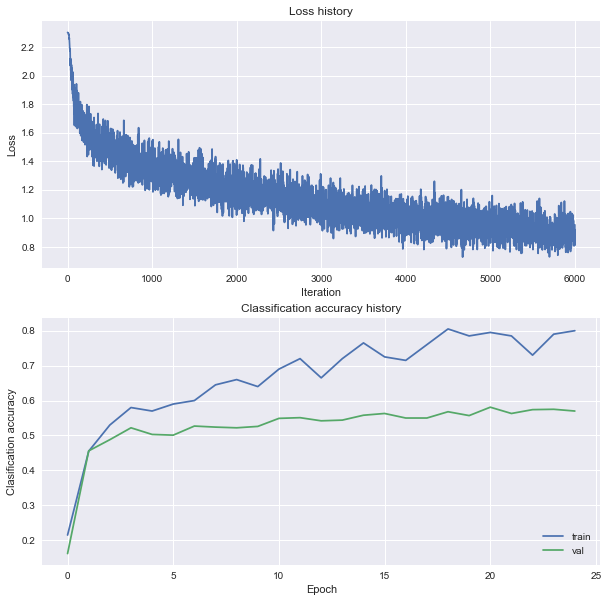

In [25]:
top = 1

for i in range(top):
    result = results[i]
    print(result)

print('\n\nPLOTS\n\n')
for i in range(top):
    result = results[i]
    print(result)
    modelname = get_modelname(*result)
    history = joblib.load('./checkpoints/' + modelname + '.pkl')
    
    # Plot the loss function and train / validation accuracies
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(history['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(history['train_acc_history'], label='train')
    plt.plot(history['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend(loc='lower right')
    plt.show()  

In [34]:
from cs231n.vis_utils import visualize_grid
from cs231n.classifiers.neural_net import TwoLayerNet

# Visualize the weights of the network

def show_net_weights(net):
    plt.figure(figsize=(150,150))
    W1 = net.params['W1']
    #cols = np.random.choice(np.arange(W1.shape[1]), size=30, replace=False)
    #W1 = W1[:, cols]
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.savefig('blah.png')
    plt.close()
    
    
hidden_size = 1500
input_size = 32 * 32 * 3
num_classes = 10

result = results[0]
modelname = get_modelname(*result)
print(modelname)
net = TwoLayerNet(input_size, hidden_size, num_classes)
net.load_model('./checkpoints/' + modelname + '.npz')
show_net_weights(net)


model.acc:0.581000.lr:-3.765838.reg:-1.423541.dropout.0.300000
